<a href="https://colab.research.google.com/github/UnitForDataScience/Microplastic_Image_Analysis/blob/master/Microplastics_Image_Isolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To Do: 

1.   R&D Watershed implimentation for generalization
2.   R&D potential alterniative isolation methodologies 
3.   Begin work on seperation of individual particles (preperation for classification and volume computation)








In [ ]:
# -------------------------------------------------------------------------------
# Name: isolate.py
# Purpose: Base code to begin working with Microplastics data
#
# Author(s):    David Little
#
# Created:      09/01/2020
# Updated:      02/04/2021
# Update Comment(s): Adopted Niharika's code
#
# TO DO:
#
# -------------------------------------------------------------------------------

from skimage.segmentation import watershed as wtrshd
from skimage.feature import peak_local_max
from scipy import ndimage
from skimage import io as skio
import matplotlib.pyplot as plt
import numpy as np
import cv2

The following work was submitted by Niharika Kundapur

# Uniform Case

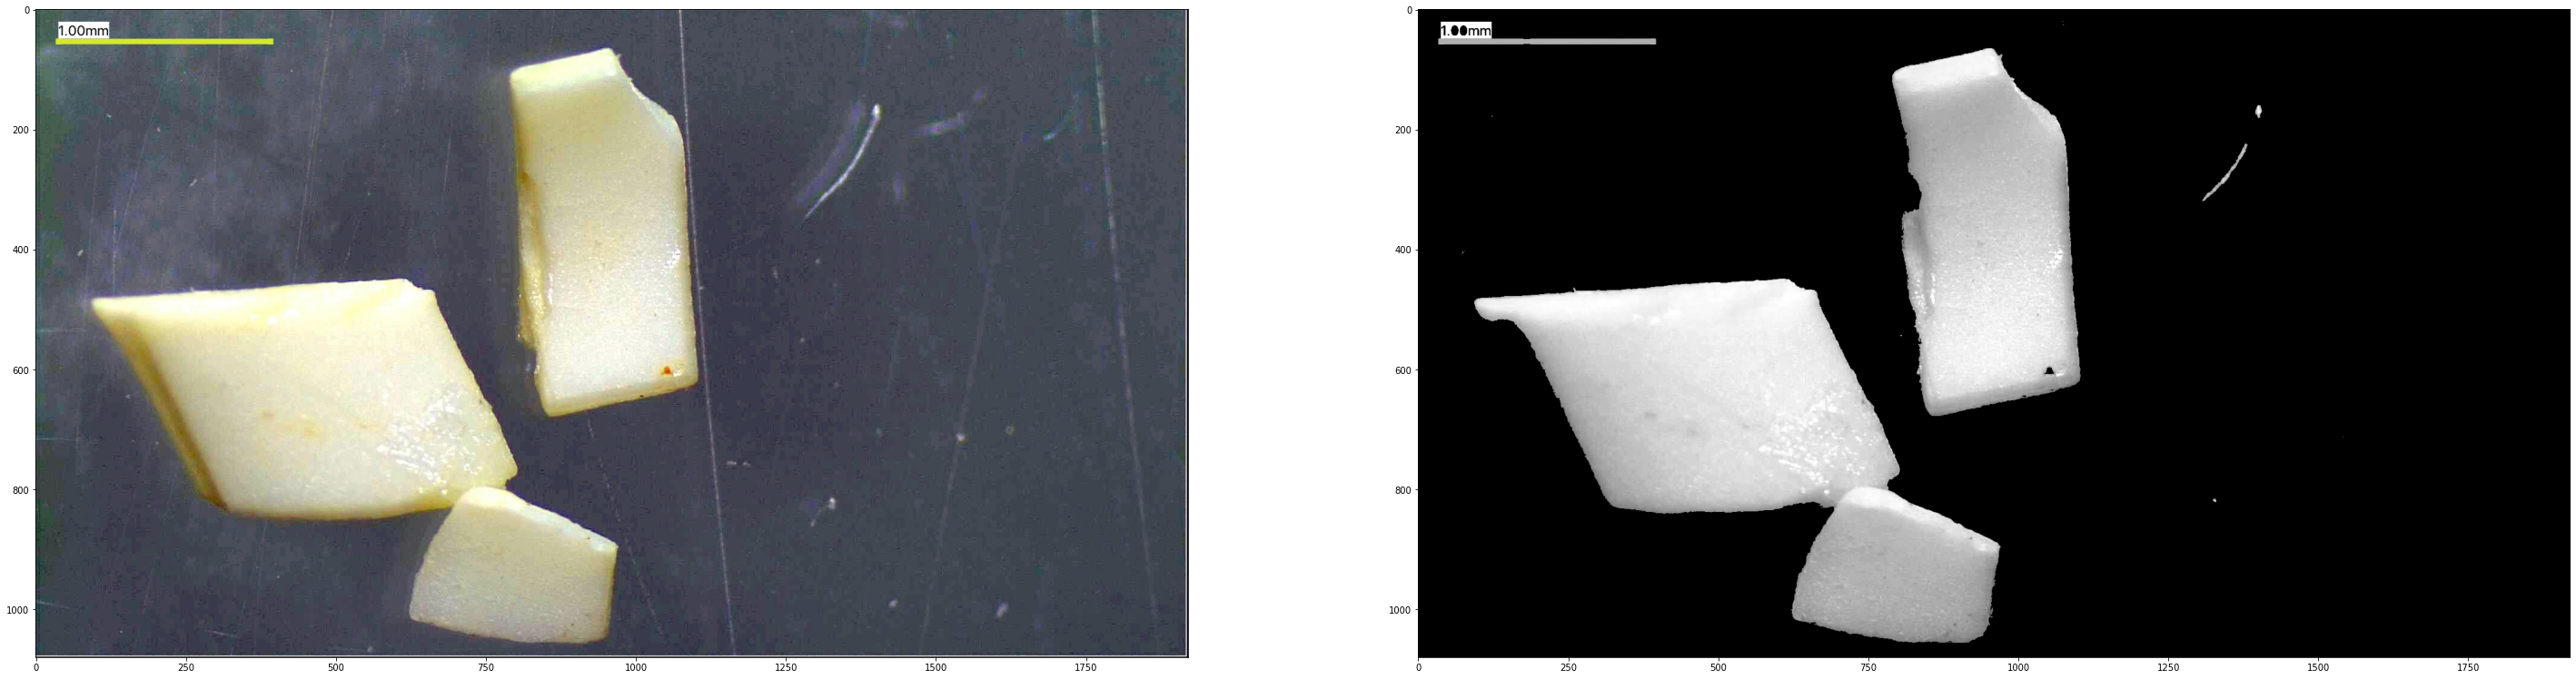

In [ ]:
##### Uniform ########
#url = 'https://raw.githubusercontent.com/UnitForDataScience/Microplastic_Image_Analysis/master/MP_pics/isolate/type_3_uniform/PP%209d001-MERGE-0.jpeg'
#url = 'https://raw.githubusercontent.com/UnitForDataScience/Microplastic_Image_Analysis/master/MP_pics/isolate/type_3_uniform/PS%200d002-MERGE-0.jpeg'
url = 'https://raw.githubusercontent.com/UnitForDataScience/Microplastic_Image_Analysis/master/MP_pics/isolate/type_3_uniform/PS%204d001-MERGE-0.jpeg'

####### Mixed #########
#url = 'https://raw.githubusercontent.com/UnitForDataScience/Microplastic_Image_Analysis/master/MP_pics/isolate/type_1_mixed/For%20Bailey001.jpeg'

####### String #########

#url = 'https://raw.githubusercontent.com/UnitForDataScience/Microplastic_Image_Analysis/master/MP_pics/isolate/type_2_string/North%20south%20causeway%20%231005-MERGE-0.jpeg'


image = skio.imread(url)

shifted = cv2.pyrMeanShiftFiltering(image, 21, 51)
# plt.imshow(image)

gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #change to grayscale

ret, thresh = cv2.threshold(gray1,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# plt.imshow(thresh)

# convert the mean shift image to grayscale, then apply
# Otsu's thresholding
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,
  cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# plt.imshow(thresh)

# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=20,
	labels=thresh)

# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
ws = wtrshd(-D, markers, mask=thresh)
# print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
# plt.imshow(ws)

background = max(set(ws.ravel()), key=lambda g: np.sum(ws == g))
background

background_mask = (ws == background)
# plt.imshow(~background_mask)
cleaned = gray1 * ~background_mask
# plt.imshow(cleaned)
# plt.imshow(cleaned, cmap='gray')
# plt.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

# plt.imshow(cleaned, cmap='gray')
# plt.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

fig, ax = plt.subplots(1,2,figsize=(50,50))
ax[0].imshow(image)
ax[1].imshow(cleaned)
ax[1].imshow(cleaned, cmap='gray')
ax[1].imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

ax[1].imshow(cleaned, cmap='gray')
ax[1].imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

ax[1].imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

# String Case

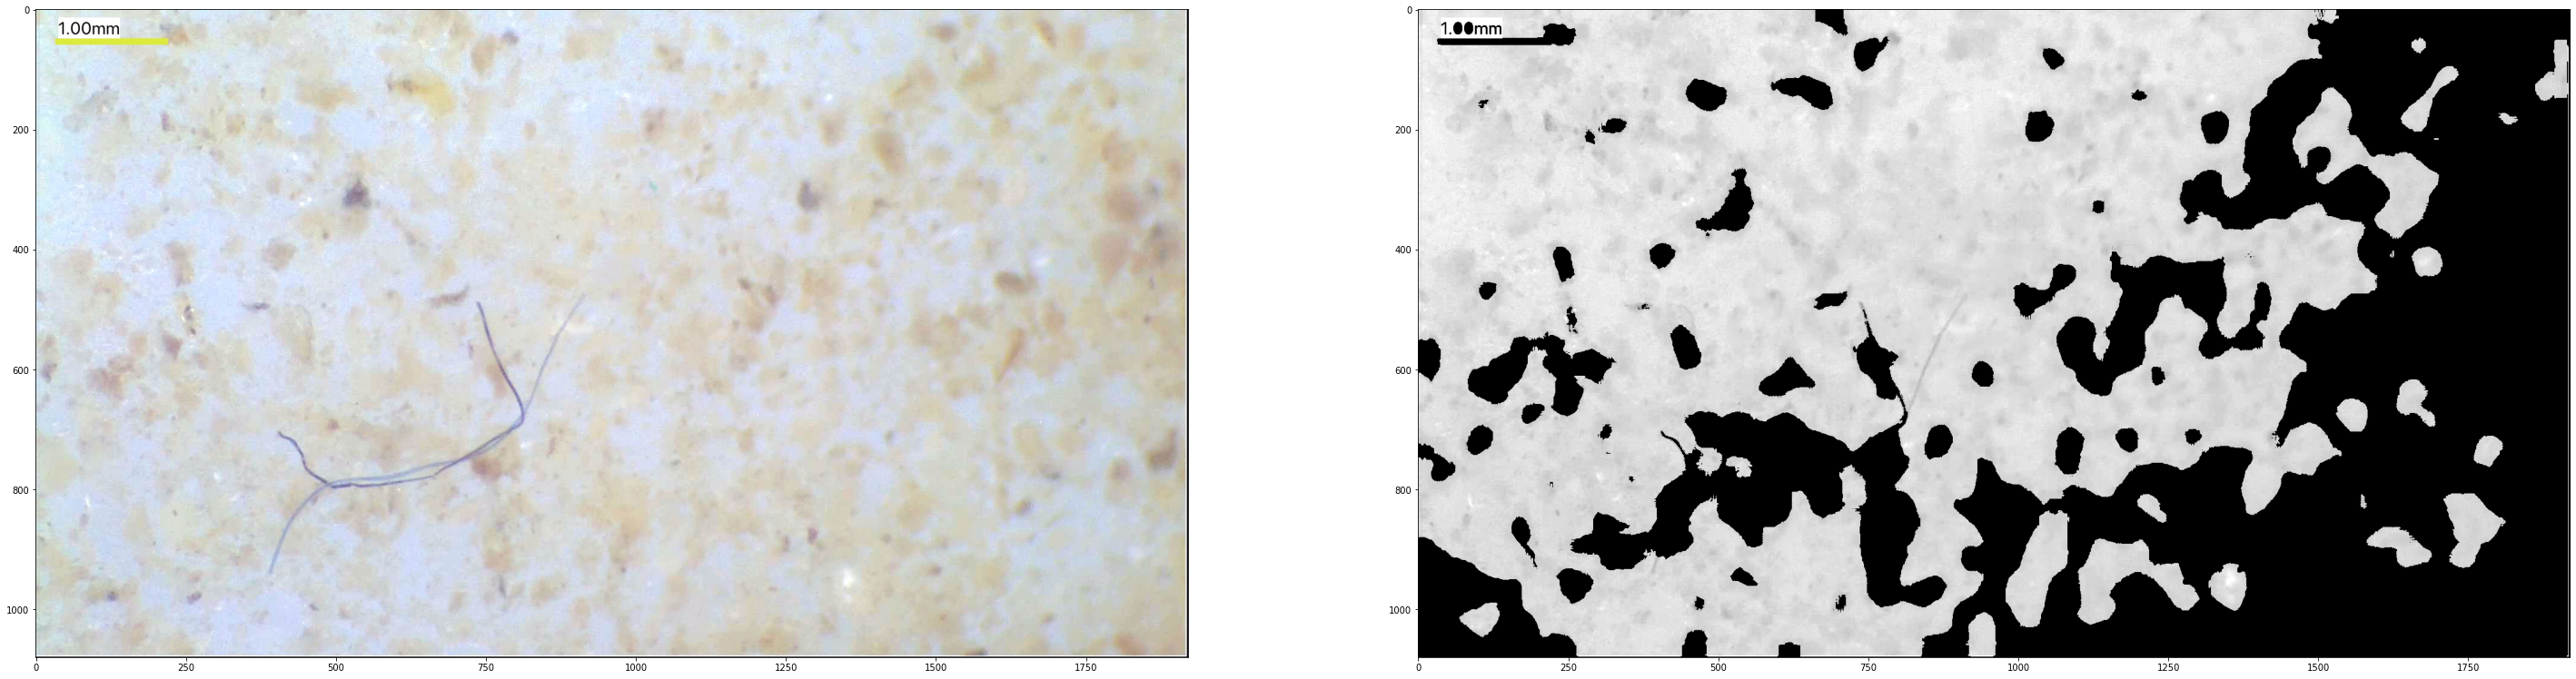

In [ ]:
####### String #########

url = 'https://raw.githubusercontent.com/UnitForDataScience/Microplastic_Image_Analysis/master/MP_pics/isolate/type_2_string/North%20south%20causeway%20%231005-MERGE-0.jpeg'


image = skio.imread(url)

shifted = cv2.pyrMeanShiftFiltering(image, 21, 51)
# plt.imshow(image)

gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #change to grayscale

ret, thresh = cv2.threshold(gray1,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# plt.imshow(thresh)

# convert the mean shift image to grayscale, then apply
# Otsu's thresholding
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,
  cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# plt.imshow(thresh)

# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=20,
	labels=thresh)

# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
ws = wtrshd(-D, markers, mask=thresh)
# print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
# plt.imshow(ws)

background = max(set(ws.ravel()), key=lambda g: np.sum(ws == g))
background

background_mask = (ws == background)
# plt.imshow(~background_mask)
cleaned = gray1 * ~background_mask
# plt.imshow(cleaned)
# plt.imshow(cleaned, cmap='gray')
# plt.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

# plt.imshow(cleaned, cmap='gray')
# plt.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

fig, ax = plt.subplots(1,2,figsize=(50,50))
ax[0].imshow(image)
ax[1].imshow(cleaned)
ax[1].imshow(cleaned, cmap='gray')
ax[1].imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

ax[1].imshow(cleaned, cmap='gray')
ax[1].imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

ax[1].imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

# Mixed Case

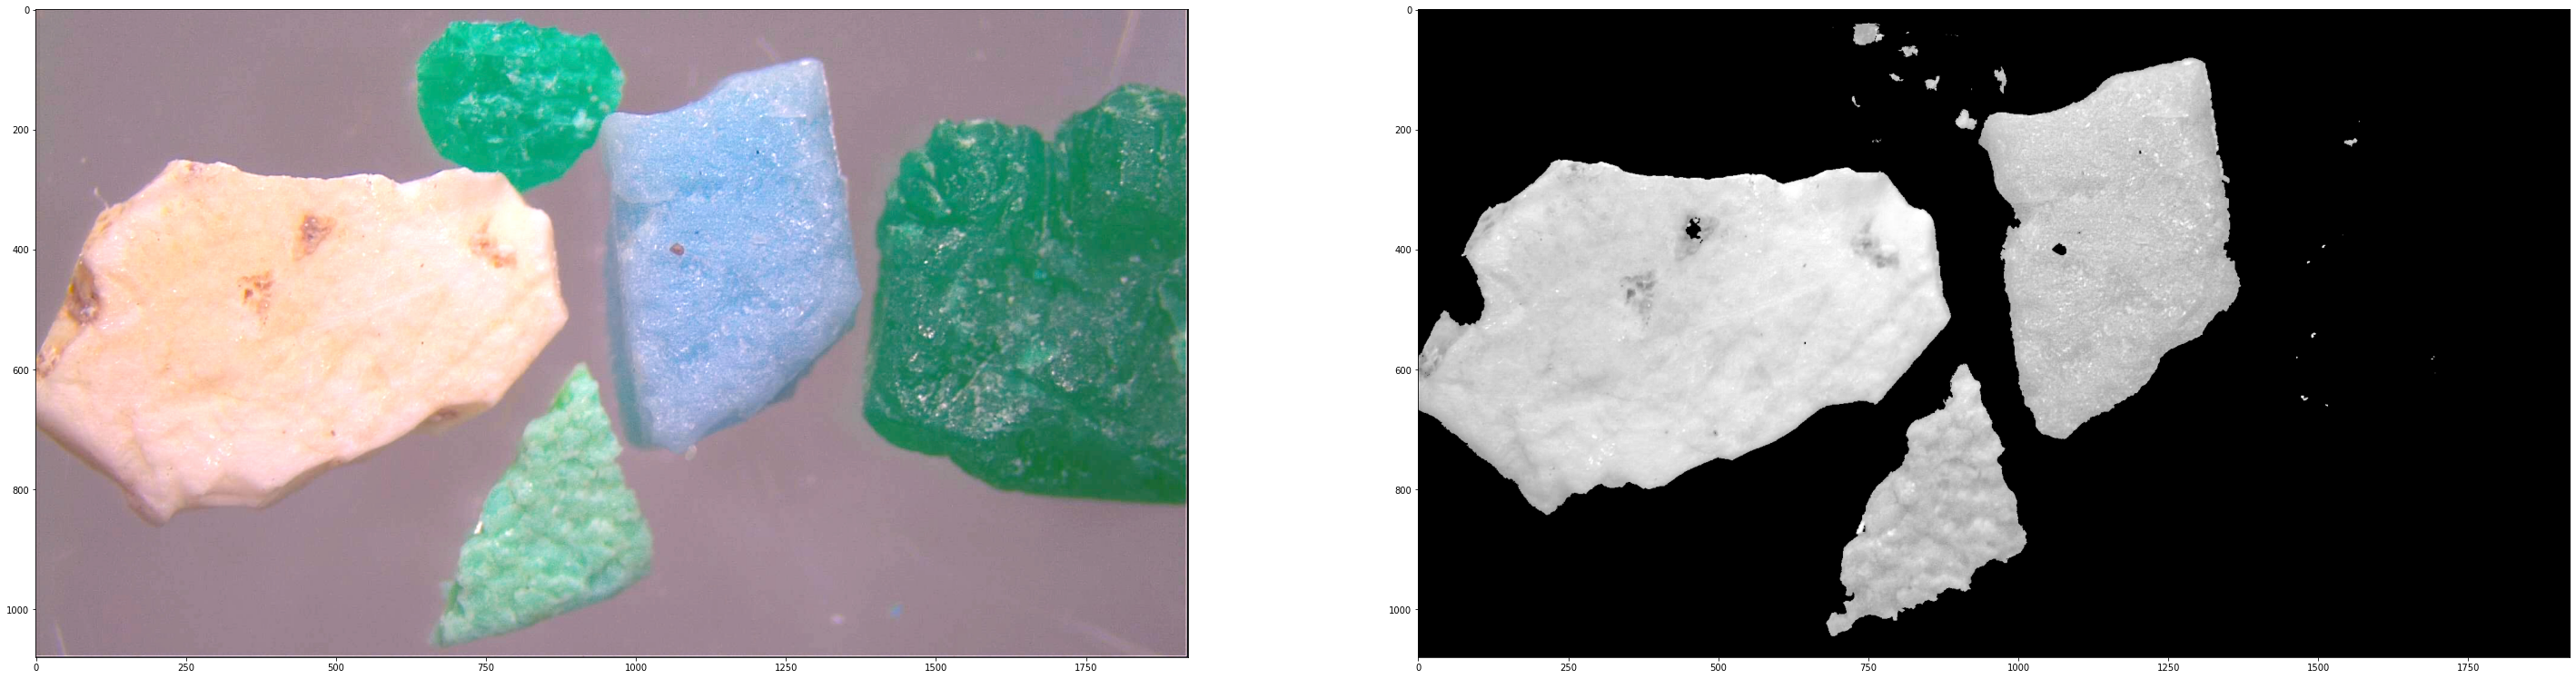

In [ ]:
####### Mixed #########
url = 'https://raw.githubusercontent.com/UnitForDataScience/Microplastic_Image_Analysis/master/MP_pics/isolate/type_1_mixed/For%20Bailey001.jpeg'

image = skio.imread(url)

shifted = cv2.pyrMeanShiftFiltering(image, 21, 51)
# plt.imshow(image)

gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #change to grayscale

ret, thresh = cv2.threshold(gray1,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# plt.imshow(thresh)

# convert the mean shift image to grayscale, then apply
# Otsu's thresholding
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,
  cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# plt.imshow(thresh)

# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=20,
	labels=thresh)

# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
ws = wtrshd(-D, markers, mask=thresh, compactness=1)
# print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
# plt.imshow(ws)

background = max(set(ws.ravel()), key=lambda g: np.sum(ws == g))
background

background_mask = (ws == background)
# plt.imshow(~background_mask)
cleaned = gray1 * ~background_mask
# plt.imshow(cleaned)
# plt.imshow(cleaned, cmap='gray')
# plt.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

# plt.imshow(cleaned, cmap='gray')
# plt.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

fig, ax = plt.subplots(1,2,figsize=(50,50))
ax[0].imshow(image)
ax[1].imshow(cleaned)
ax[1].imshow(cleaned, cmap='gray')
ax[1].imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

ax[1].imshow(cleaned, cmap='gray')
ax[1].imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

ax[1].imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

# Canny Edge Detection

In [ ]:
#### Canny Edge Detection ######
# https://docs.opencv.org/3.4/da/d5c/tutorial_canny_detector.html

from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
from skimage import io as skio
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2
import math
import argparse

#url = 'https://raw.githubusercontent.com/UnitForDataScience/Microplastic_Image_Analysis/master/MP_pics/isolate/type_3_uniform/PP%209d001-MERGE-0.jpeg'
#url = 'https://raw.githubusercontent.com/UnitForDataScience/Microplastic_Image_Analysis/master/MP_pics/isolate/type_3_uniform/PS%200d002-MERGE-0.jpeg'
url = 'https://raw.githubusercontent.com/UnitForDataScience/Microplastic_Image_Analysis/master/MP_pics/isolate/type_3_uniform/PS%204d001-MERGE-0.jpeg'
#String 
url = 'https://raw.githubusercontent.com/UnitForDataScience/Microplastic_Image_Analysis/master/MP_pics/isolate/type_2_string/North%20south%20causeway%20%231005-MERGE-0.jpeg'
#mixed
#url = 'https://raw.githubusercontent.com/UnitForDataScience/Microplastic_Image_Analysis/master/MP_pics/isolate/type_1_mixed/For%20Bailey001.jpeg'

# Loads an image
image = skio.imread(url)
src = image
# Check if image is loaded fine
low_threshold =35
ratio = 3

kernel_size = 4
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
img_blur = cv2.blur(src_gray, (3,3))
detected_edges = cv2.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
mask = detected_edges != 0
dst = src * (mask[:,:,None].astype(src.dtype))

fig, ax = plt.subplots(1,2,figsize=(50,50))
ax[0].imshow(src)
ax[1].imshow(dst)
# ax[2].imshow(cdstP)

# Random Forest Segmentation

https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_trainable_segmentation.html#sphx-glr-auto-examples-segmentation-plot-trainable-segmentation-py

In [12]:
from itertools import combinations_with_replacement
import itertools
import numpy as np
from skimage import filters, feature
from skimage import img_as_float32
from concurrent.futures import ThreadPoolExecutor

def _texture_filter(gaussian_filtered):
    H_elems = [
        np.gradient(np.gradient(gaussian_filtered)[ax0], axis=ax1)
        for ax0, ax1 in combinations_with_replacement(range(gaussian_filtered.ndim), 2)
    ]
    eigvals = feature.hessian_matrix_eigvals(H_elems)
    return eigvals


def _singlescale_basic_features_singlechannel(
    img, sigma, intensity=True, edges=True, texture=True
):
    results = ()
    gaussian_filtered = filters.gaussian(img, sigma)
    if intensity:
        results += (gaussian_filtered,)
    if edges:
        results += (filters.sobel(gaussian_filtered),)
    if texture:
        results += (*_texture_filter(gaussian_filtered),)
    return results


def _mutiscale_basic_features_singlechannel(
    img,
    intensity=True,
    edges=True,
    texture=True,
    sigma_min=0.5,
    sigma_max=16,
    num_sigma=None,
    num_workers=None,
):
    """Features for a single channel nd image.
    Parameters
    ----------
    img : ndarray
        Input image, which can be grayscale or multichannel.
    intensity : bool, default True
        If True, pixel intensities averaged over the different scales
        are added to the feature set.
    edges : bool, default True
        If True, intensities of local gradients averaged over the different
        scales are added to the feature set.
    texture : bool, default True
        If True, eigenvalues of the Hessian matrix after Gaussian blurring
        at different scales are added to the feature set.
    sigma_min : float, optional
        Smallest value of the Gaussian kernel used to average local
        neighbourhoods before extracting features.
    sigma_max : float, optional
        Largest value of the Gaussian kernel used to average local
        neighbourhoods before extracting features.
    num_sigma : int, optional
        Number of values of the Gaussian kernel between sigma_min and sigma_max.
        If None, sigma_min multiplied by powers of 2 are used.
    num_workers : int or None, optional
        The number of parallel threads to use. If set to ``None``, the full
        set of available cores are used.
    Returns
    -------
    features : list
        List of features, each element of the list is an array of shape as img.
    """
    # computations are faster as float32
    img = np.ascontiguousarray(img_as_float32(img))
    if num_sigma is None:
        num_sigma = int(np.log2(sigma_max) - np.log2(sigma_min) + 1)
    sigmas = np.logspace(
        np.log2(sigma_min),
        np.log2(sigma_max),
        num=num_sigma,
        base=2,
        endpoint=True,
    )
    with ThreadPoolExecutor(max_workers=num_workers) as ex:
        out_sigmas = list(
            ex.map(
                lambda s: _singlescale_basic_features_singlechannel(
                    img, s, intensity=intensity, edges=edges, texture=texture
                ),
                sigmas,
            )
        )
    features = itertools.chain.from_iterable(out_sigmas)
    return features


def multiscale_basic_features(
    image,
    multichannel=False,
    intensity=True,
    edges=True,
    texture=True,
    sigma_min=0.5,
    sigma_max=16,
    num_sigma=None,
    num_workers=None,
):
    """Local features for a single- or multi-channel nd image.
    Intensity, gradient intensity and local structure are computed at
    different scales thanks to Gaussian blurring.
    Parameters
    ----------
    image : ndarray
        Input image, which can be grayscale or multichannel.
    multichannel : bool, default False
        True if the last dimension corresponds to color channels.
    intensity : bool, default True
        If True, pixel intensities averaged over the different scales
        are added to the feature set.
    edges : bool, default True
        If True, intensities of local gradients averaged over the different
        scales are added to the feature set.
    texture : bool, default True
        If True, eigenvalues of the Hessian matrix after Gaussian blurring
        at different scales are added to the feature set.
    sigma_min : float, optional
        Smallest value of the Gaussian kernel used to average local
        neighbourhoods before extracting features.
    sigma_max : float, optional
        Largest value of the Gaussian kernel used to average local
        neighbourhoods before extracting features.
    num_sigma : int, optional
        Number of values of the Gaussian kernel between sigma_min and sigma_max.
        If None, sigma_min multiplied by powers of 2 are used.
    num_workers : int or None, optional
        The number of parallel threads to use. If set to ``None``, the full
        set of available cores are used.
    Returns
    -------
    features : np.ndarray
        Array of shape ``image.shape + (n_features,)``
    """
    if not any([intensity, edges, texture]):
        raise ValueError(
                "At least one of ``intensity``, ``edges`` or ``textures``"
                "must be True for features to be computed."
                )
    if image.ndim < 3:
        multichannel = False
    if not multichannel:
        image = image[..., np.newaxis]
    all_results = (
        _mutiscale_basic_features_singlechannel(
            image[..., dim],
            intensity=intensity,
            edges=edges,
            texture=texture,
            sigma_min=sigma_min,
            sigma_max=sigma_max,
            num_sigma=num_sigma,
            num_workers=num_workers,
        )
        for dim in range(image.shape[-1])
    )
    features = list(itertools.chain.from_iterable(all_results))
    return np.stack(features, axis=-1)

In [16]:
try:
    from sklearn.exceptions import NotFittedError
    from sklearn.ensemble import RandomForestClassifier
    has_sklearn = True
except ImportError:
    has_sklearn = False

    class NotFittedError(Exception):
        pass


class TrainableSegmenter(object):
    """Estimator for classifying pixels.
    Parameters
    ----------
    clf : classifier object, optional
        classifier object, exposing a ``fit`` and a ``predict`` method as in
        scikit-learn's API, for example an instance of
        ``RandomForestClassifier`` or ``LogisticRegression`` classifier.
    features_func : function, optional
        function computing features on all pixels of the image, to be passed
        to the classifier. The output should be of shape
        ``(m_features, *labels.shape)``. If None,
        :func:`skimage.segmentation.multiscale_basic_features` is used.
    Methods
    -------
    compute_features
    fit
    predict
    """

    def __init__(self, clf=None, features_func=None):
        if clf is None:
            if has_sklearn:
                self.clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
            else:
                raise ImportError(
                    "Please install scikit-learn or pass a classifier instance"
                    "to TrainableSegmenter."
                )
        else:
            self.clf = clf
        self.features_func = features_func

    def compute_features(self, image):
        if self.features_func is None:
            self.features_func = multiscale_basic_features
        self.features = self.features_func(image)

    def fit(self, image, labels):
        """Train classifier using partially labeled (annotated) image.
        Parameters
        ----------
        image : ndarray
            Input image, which can be grayscale or multichannel, and must have a
            number of dimensions compatible with ``self.features_func``.
        labels : ndarray of ints
            Labeled array of shape compatible with ``image`` (same shape for a
            single-channel image). Labels >= 1 correspond to the training set and
            label 0 to unlabeled pixels to be segmented.
        """
        self.compute_features(image)
        clf = fit_segmenter(labels, self.features, self.clf)

    def predict(self, image):
        """Segment new image using trained internal classifier.
        Parameters
        ----------
        image : ndarray
            Input image, which can be grayscale or multichannel, and must have a
            number of dimensions compatible with ``self.features_func``.
        Raises
        ------
        NotFittedError if ``self.clf`` has not been fitted yet (use ``self.fit``).
        """
        if self.features_func is None:
            self.features_func = multiscale_basic_features
        features = self.features_func(image)
        return predict_segmenter(features, self.clf)


def fit_segmenter(labels, features, clf):
    """Segmentation using labeled parts of the image and a classifier.
    Parameters
    ----------
    labels : ndarray of ints
        Image of labels. Labels >= 1 correspond to the training set and
        label 0 to unlabeled pixels to be segmented.
    features : ndarray
        Array of features, with the first dimension corresponding to the number
        of features, and the other dimensions correspond to ``labels.shape``.
    clf : classifier object
        classifier object, exposing a ``fit`` and a ``predict`` method as in
        scikit-learn's API, for example an instance of
        ``RandomForestClassifier`` or ``LogisticRegression`` classifier.
    Returns
    -------
    clf : classifier object
        classifier trained on ``labels``
    Raises
    ------
    NotFittedError if ``self.clf`` has not been fitted yet (use ``self.fit``).
    """
    mask = labels > 0
    training_data = features[mask]
    training_labels = labels[mask].ravel()
    clf.fit(training_data, training_labels)
    return clf


def predict_segmenter(features, clf):
    """Segmentation of images using a pretrained classifier.
    Parameters
    ----------
    features : ndarray
        Array of features, with the last dimension corresponding to the number
        of features, and the other dimensions are compatible with the shape of
        the image to segment, or a flattened image.
    clf : classifier object
        trained classifier object, exposing a ``predict`` method as in
        scikit-learn's API, for example an instance of
        ``RandomForestClassifier`` or ``LogisticRegression`` classifier. The
        classifier must be already trained, for example with
        :func:`skimage.segmentation.fit_segmenter`.
    Returns
    -------
    output : ndarray
        Labeled array, built from the prediction of the classifier.
    """
    sh = features.shape
    if features.ndim > 2:
        features = features.reshape((-1, sh[-1]))

    try:
        predicted_labels = clf.predict(features)
    except NotFittedError:
        raise NotFittedError(
            "You must train the classifier `clf` first"
            "for example with the `fit_segmenter` function."
        )
    except ValueError as err:
        if err.args and 'x must consist of vectors of length' in err.args[0]:
            raise ValueError(
                err.args[0] + '\n' +
                "Maybe you did not use the same type of features for training the classifier."
                )
    output = predicted_labels.reshape(sh[:-1])
    return output

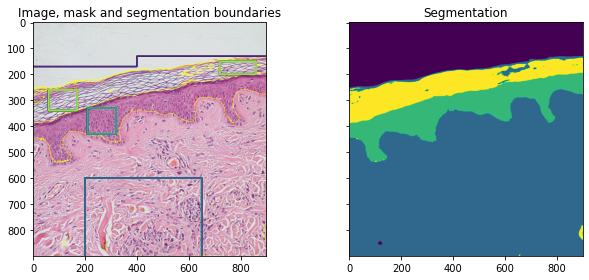

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, segmentation, feature, future
from sklearn.ensemble import RandomForestClassifier
from functools import partial
from skimage import io as skio
#  from skimage.future import tainable_segmentation


url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Normal_Epidermis_and_Dermis_with_Intradermal_Nevus_10x.JPG/1280px-Normal_Epidermis_and_Dermis_with_Intradermal_Nevus_10x.JPG'

full_img = skio.imread(url)

img = full_img[:900, :900]

# Build an array of labels for training the segmentation.
# Here we use rectangles but visualization libraries such as plotly
# (and napari?) can be used to draw a mask on the image.
training_labels = np.zeros(img.shape[:2], dtype=np.uint8)
training_labels[:130] = 1
training_labels[:170, :400] = 1
training_labels[600:900, 200:650] = 2
training_labels[330:430, 210:320] = 3
training_labels[260:340, 60:170] = 4
training_labels[150:200, 720:860] = 4

sigma_min = 1
sigma_max = 16
features_func = partial(multiscale_basic_features,
                        intensity=True, edges=False, texture=True,
                        sigma_min=sigma_min, sigma_max=sigma_max,
                        multichannel=True)
features = features_func(img)
clf = RandomForestClassifier(n_estimators=50, n_jobs=-1,
                             max_depth=10, max_samples=0.05)

seg = TrainableSegmenter(img)
clf = fit_segmenter(training_labels, features, clf)
result = predict_segmenter(features, clf)

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))
ax[0].imshow(segmentation.mark_boundaries(img, result, mode='thick'))
ax[0].contour(training_labels)
ax[0].set_title('Image, mask and segmentation boundaries')
ax[1].imshow(result)
ax[1].set_title('Segmentation')
fig.tight_layout()

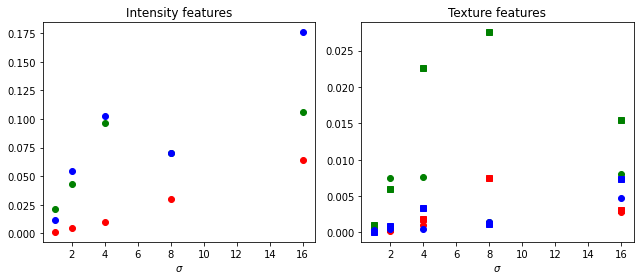

In [19]:
# Feature Importance

fig, ax = plt.subplots(1, 2, figsize=(9, 4))
l = len(clf.feature_importances_)
feature_importance = (
        clf.feature_importances_[:l//3],
        clf.feature_importances_[l//3:2*l//3],
        clf.feature_importances_[2*l//3:])
sigmas = np.logspace(
        np.log2(sigma_min), np.log2(sigma_max),
        num=int(np.log2(sigma_max) - np.log2(sigma_min) + 1),
        base=2, endpoint=True)
for ch, color in zip(range(3), ['r', 'g', 'b']):
    ax[0].plot(sigmas, feature_importance[ch][::3], 'o', color=color)
    ax[0].set_title("Intensity features")
    ax[0].set_xlabel("$\\sigma$")
for ch, color in zip(range(3), ['r', 'g', 'b']):
    ax[1].plot(sigmas, feature_importance[ch][1::3], 'o', color=color)
    ax[1].plot(sigmas, feature_importance[ch][2::3], 's', color=color)
    ax[1].set_title("Texture features")
    ax[1].set_xlabel("$\\sigma$")

fig.tight_layout()

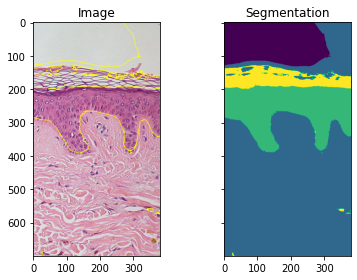

In [21]:
# Fitting New Image

img_new = full_img[:700, 900:]

features_new = features_func(img_new)
result_new = predict_segmenter(features_new, clf)
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(6, 4))
ax[0].imshow(segmentation.mark_boundaries(img_new, result_new, mode='thick'))
ax[0].set_title('Image')
ax[1].imshow(result_new)
ax[1].set_title('Segmentation')
fig.tight_layout()

plt.show()